In this Personal Project, I analyze the data and perform a K Nearest Neighbor Machine Learning Algorithm on another dataset. The values are not defined and the columns are classified. Regardless, I go through the basic steps of data analytics, visualization, and machine learning. 

1. Read in the dataset and receive general descriptions
2. View the dataset using the pandas library and did a little bit of exploratory data analysis
3. Standardized variables using SciKit Learn
4. Performed a train test split on the data set
5. Sucessfully outputted predictions for X_test or 'TARGET CLASS'
6. Printed out Confusion Matrix and Classification Reports for dataset
7. Optimized the performance of the model to find the best k value for a low error rate, while also keeping the k value low.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Import Libraries

In [33]:
df = pd.read_csv('KNN_Project_Data')

In [34]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

Read in dataset from csv and view the dataset

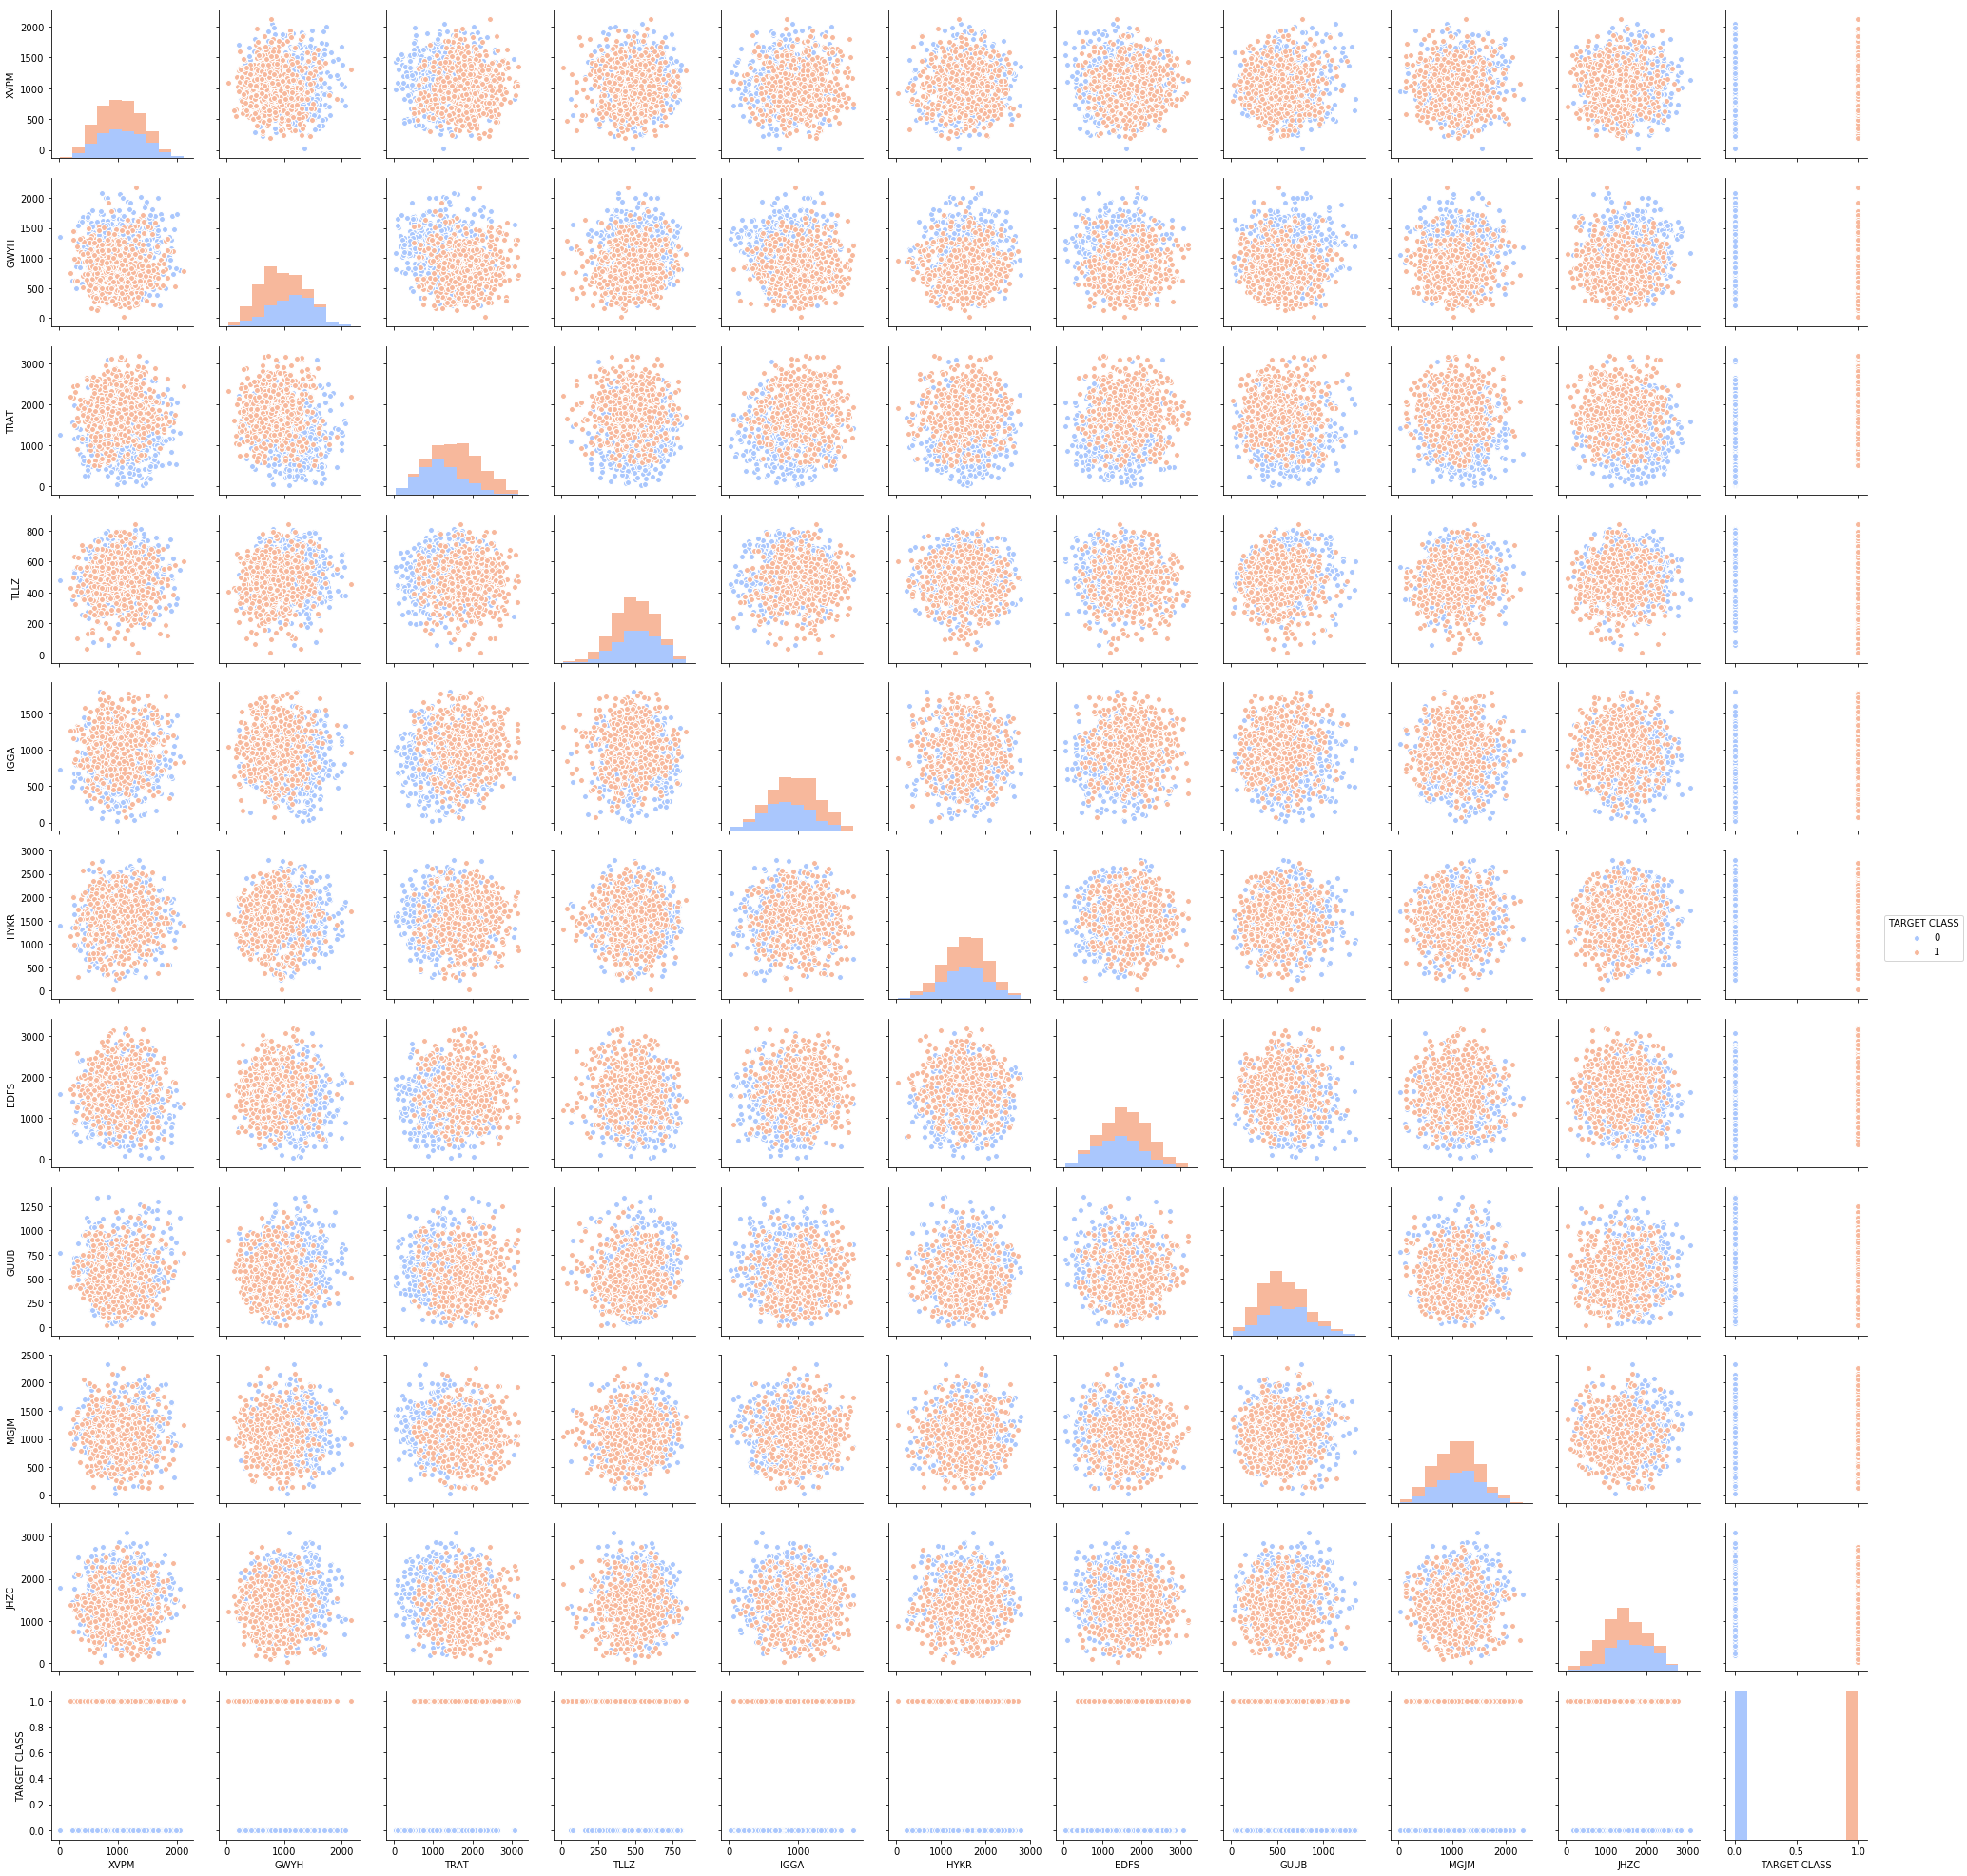

In [57]:
sns.pairplot(data=df,hue='TARGET CLASS',palette='coolwarm')

from the pairplot it seems as though there is good separation

Use of Seaborn pairplot for data visualization

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Use sklearn preprocessing to import Standard Scaler
Create scaler object

Fit the features

set new variable scaled_features and use Scaler.transfor to scale the features exclusing the Target class which is what we are trying to predict

Use the pandas library in order to create a data frame with the scaled features

In [39]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [40]:
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ..., 
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [59]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1]) #excluse the target class (y_test)

In [60]:
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [61]:
from sklearn.model_selection import train_test_split

In [69]:
X = df_feat #cleaned with the columns that we want
y = df['TARGET CLASS'] #the variable we are trying to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

train test split used to split the data into a training set and a testing set

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=1) #1 is our kvalue

In [72]:
knn.fit(X_train,y_train) #fitting the KNN model to the training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Now we evaluate the KNN model

In [73]:
pred = knn.predict(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,pred))

[[109  43]
 [ 41 107]]


In [77]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300



According to the classification report we are approximately at 72 percent accuracy along with precision and recall

In [96]:
error_rate = []  #stores error_rate for k values in a list

for i in range(1,60): #i is a representation of k

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)   
    error_rate.append(np.mean(pred_i != y_test))

#repeat the previous steps above in a loop for k values from 1 to 40
#then use numpy to find the average of where the predictions were not equal to actual test values
#append those values to error rate to form list
    

In [97]:
plt.figure(figsize=(10,6))

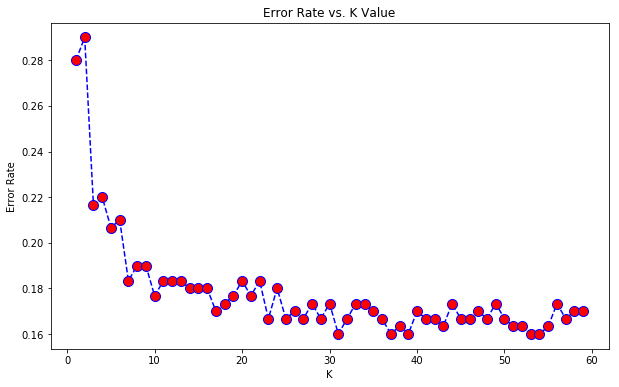

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

It appears that as the k value increases, the error rate drops further and further. However overall, K Value = 30 seems to be the best option. In the following steps I retrain the model with the new K Value.

In [99]:
knn = KNeighborsClassifier(n_neighbors=30)

In [100]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [104]:
predictions = knn.predict(X_test)

In [108]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.82      0.83       152
          1       0.82      0.84      0.83       148

avg / total       0.83      0.83      0.83       300

[[124  28]
 [ 24 124]]


By retraining the model with an optimized K Value, I was able to improve the accuracy, precision, and recall by approximately 11 percent. 